### Loading processed discussion board data

In [129]:
import pandas as pd
import numpy as np
df = pd.read_pickle('data_clean.pkl')
df.Message_words = df.Message_words.apply(lambda x: [i.lower() for i in x])
df

,Date,User_Id,Message,NumberOfPastPosts,Role,Message_words
0,2001-09-01,pat,Need help choosing your next vehicle? Tell us ...,"10,421",Member,"[need, help, choosing, next, vehicle, tell, us..."
1,2001-09-01,willow25,"I'm buying a ""new"" car by the end of the year ...",2,Member,"[im, buying, new, car, end, year, first, choic..."
2,2001-10-01,dindak,Buy a 2001/ 2002 Oldsmobile Intrigue. It's one...,"6,632",Member,"[buy, 2001, 2002, oldsmobile, intrigue, one, b..."
3,2001-10-01,peteri1,Am looking at 1 of 4 choices to replace my 99G...,21,Member,"[looking, 1, 4, choices, replace, 99gs400, ive..."
4,2001-10-01,mrdetailer,Generally a 3-4 year old car range is a good o...,"1,118",Member,"[generally, 34, year, old, car, range, good, o..."
...,...,...,...,...,...,...
4146,2021-02-01,kyfdx,qbrozen said: show previous quoteskyfdx said:I...,"203,030",Moderator,"[qbrozen, said, show, previous, quoteskyfdx, s..."
4147,2021-02-01,backy,KamCottage said:Thank you backy. Since I first...,"18,946",Member,"[kamcottage, saidthank, backy, since, first, p..."
4148,2021-02-01,RayeEliza,I am doing major research in trying to find my...,6,Member,"[major, research, trying, find, new, car, lean..."
4149,2021-02-01,mlevine,I would lean toward subaru. Need to see which ...,512,Member,"[would, lean, toward, subaru, need, see, model..."


### Loading and cleaning models.csv

In [130]:
models = pd.read_csv('models.csv', header=None, names = ['brand', 'model'])
models['brand'] = models['brand'].str.replace(r'[^\w\s]+', '', regex=True)
models['model'] = models['model'].str.replace(r'[^\w\s]+', '', regex=True)

#drop row with: car, problem, seat 
searchfor = ["car", "problem", "seat", "sedan"]
models = models[~models.brand.str.contains('|'.join(searchfor))]

models

,brand,model
0,acura,integra
1,acura,Legend
2,acura,vigor
3,acura,rlx
4,acura,ILX
...,...,...
523,volvo,xc90
524,volvo,s60
525,volvo,s80
526,volvo,v60


### Replacing models with brands

In [131]:
messages = df.Message_words.to_list()

In [132]:
# numpy.where to do the replacement
messages2 = []
t = 0
for m in messages:
    for i,row in models.iterrows():
        m = np.where(m == row['model'], row['brand'], m)
        
    t+=1
    #print(t)
        
    messages2.append(m)
        
df['Message_words_v2'] = messages2

In [133]:
import joblib 
df.to_pickle('df_brands.pickle')

### Brand Frequency Count 

In [134]:
df = pd.read_pickle("df_brands.pickle")
df

,Date,User_Id,Message,NumberOfPastPosts,Role,Message_words,Message_words_v2
0,2001-09-01,pat,Need help choosing your next vehicle? Tell us ...,"10,421",Member,"[need, help, choosing, next, vehicle, tell, us...","[need, help, choosing, next, vehicle, tell, us..."
1,2001-09-01,willow25,"I'm buying a ""new"" car by the end of the year ...",2,Member,"[im, buying, new, car, end, year, first, choic...","[im, buying, new, car, end, year, first, choic..."
2,2001-10-01,dindak,Buy a 2001/ 2002 Oldsmobile Intrigue. It's one...,"6,632",Member,"[buy, 2001, 2002, oldsmobile, intrigue, one, b...","[buy, 2001, 2002, oldsmobile, intrigue, one, b..."
3,2001-10-01,peteri1,Am looking at 1 of 4 choices to replace my 99G...,21,Member,"[looking, 1, 4, choices, replace, 99gs400, ive...","[looking, 1, 4, choices, replace, 99gs400, ive..."
4,2001-10-01,mrdetailer,Generally a 3-4 year old car range is a good o...,"1,118",Member,"[generally, 34, year, old, car, range, good, o...","[generally, 34, year, old, car, range, good, o..."
...,...,...,...,...,...,...,...
4146,2021-02-01,kyfdx,qbrozen said: show previous quoteskyfdx said:I...,"203,030",Moderator,"[qbrozen, said, show, previous, quoteskyfdx, s...","[qbrozen, said, show, previous, quoteskyfdx, s..."
4147,2021-02-01,backy,KamCottage said:Thank you backy. Since I first...,"18,946",Member,"[kamcottage, saidthank, backy, since, first, p...","[kamcottage, saidthank, backy, since, first, p..."
4148,2021-02-01,RayeEliza,I am doing major research in trying to find my...,6,Member,"[major, research, trying, find, new, car, lean...","[major, research, trying, find, new, car, lean..."
4149,2021-02-01,mlevine,I would lean toward subaru. Need to see which ...,512,Member,"[would, lean, toward, subaru, need, see, model...","[would, lean, toward, subaru, need, see, model..."


In [135]:
mentions = []
brand_names = models.brand.unique()

for i in brand_names: 
    count = 0
    for j in df.Message_words_v2: 
        if(i in j):
            count +=1 
    
    mentions.append(count)

### Identifying top 10 brands by frequency:

In [136]:
brand_freq = pd.DataFrame({'brand': brand_names, 'mentions': mentions})
top10 = brand_freq.sort_values('mentions', ascending = False).head(10)
top10

,brand,mentions
9,honda,924
25,toyota,769
19,nissan,525
26,volkswagen,370
5,chevrolet,337
15,mazda,312
8,ford,284
2,bmw,275
11,hyundai,237
1,audi,224


In [137]:
brand_names = top10.brand

for i in brand_names: 
    y = []
    for j in df.Message_words_v2: 
        if(i in j):
            var = 1
            y.append(var)
        else: 
            var = 0
            y.append(var)  
    
    df[i] = y

    
df

,Date,User_Id,Message,NumberOfPastPosts,Role,Message_words,Message_words_v2,honda,toyota,nissan,volkswagen,chevrolet,mazda,ford,bmw,hyundai,audi
0,2001-09-01,pat,Need help choosing your next vehicle? Tell us ...,"10,421",Member,"[need, help, choosing, next, vehicle, tell, us...","[need, help, choosing, next, vehicle, tell, us...",0,0,0,0,0,0,0,0,0,0
1,2001-09-01,willow25,"I'm buying a ""new"" car by the end of the year ...",2,Member,"[im, buying, new, car, end, year, first, choic...","[im, buying, new, car, end, year, first, choic...",0,0,1,0,0,0,0,0,0,0
2,2001-10-01,dindak,Buy a 2001/ 2002 Oldsmobile Intrigue. It's one...,"6,632",Member,"[buy, 2001, 2002, oldsmobile, intrigue, one, b...","[buy, 2001, 2002, oldsmobile, intrigue, one, b...",0,0,0,0,0,0,0,0,0,0
3,2001-10-01,peteri1,Am looking at 1 of 4 choices to replace my 99G...,21,Member,"[looking, 1, 4, choices, replace, 99gs400, ive...","[looking, 1, 4, choices, replace, 99gs400, ive...",0,0,0,0,0,0,0,0,0,1
4,2001-10-01,mrdetailer,Generally a 3-4 year old car range is a good o...,"1,118",Member,"[generally, 34, year, old, car, range, good, o...","[generally, 34, year, old, car, range, good, o...",0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4146,2021-02-01,kyfdx,qbrozen said: show previous quoteskyfdx said:I...,"203,030",Moderator,"[qbrozen, said, show, previous, quoteskyfdx, s...","[qbrozen, said, show, previous, quoteskyfdx, s...",1,1,0,0,0,0,0,0,0,0
4147,2021-02-01,backy,KamCottage said:Thank you backy. Since I first...,"18,946",Member,"[kamcottage, saidthank, backy, since, first, p...","[kamcottage, saidthank, backy, since, first, p...",1,1,0,0,0,0,0,0,0,0
4148,2021-02-01,RayeEliza,I am doing major research in trying to find my...,6,Member,"[major, research, trying, find, new, car, lean...","[major, research, trying, find, new, car, lean...",0,1,0,0,0,0,0,0,0,0
4149,2021-02-01,mlevine,I would lean toward subaru. Need to see which ...,512,Member,"[would, lean, toward, subaru, need, see, model...","[would, lean, toward, subaru, need, see, model...",1,0,0,0,0,1,0,0,0,0


In [138]:
#calculating probability of brand occurences 

tot_messages = df.shape[0]
brand_names = top10.brand.to_list()

prob_df = pd.DataFrame(columns = brand_names)

for i in brand_names: 
    prob =[]
    for j in brand_names: 
        if i == j: 
            #calculating P(I)
            prob_val = df[i].sum()/tot_messages
            prob.append(prob_val)
        else:
            #calculating P(I&J)
            both = 0
            for c in range(tot_messages):
                if df[i][c] == 1 & df[j][c] == 1:
                    both += 1
            prob_val = both/tot_messages 
            prob.append(prob_val)
                             
    prob_df[i] = prob

#renaming the index 
prob_df.index = brand_names
prob_df      


,honda,toyota,nissan,volkswagen,chevrolet,mazda,ford,bmw,hyundai,audi
honda,0.222597,0.081908,0.050831,0.026259,0.024091,0.024813,0.025536,0.013009,0.024331,0.010600
toyota,0.081908,0.185257,0.037822,0.021682,0.026741,0.024091,0.022886,0.011323,0.020236,0.007468
nissan,0.050831,0.037822,0.126476,0.016141,0.013732,0.012286,0.008914,0.006745,0.010359,0.006986
volkswagen,0.026259,0.021682,0.016141,0.089135,0.010600,0.011323,0.008191,0.008191,0.006745,0.011082
chevrolet,0.024091,0.026741,0.013732,0.010600,0.081185,0.008673,0.017345,0.004095,0.007227,0.002891
mazda,0.024813,0.024091,0.012286,0.011323,0.008673,0.075163,0.011563,0.003614,0.008191,0.003854
ford,0.025536,0.022886,0.008914,0.008191,0.017345,0.011563,0.068417,0.004577,0.008914,0.003132
bmw,0.013009,0.011323,0.006745,0.008191,0.004095,0.003614,0.004577,0.066249,0.003132,0.016623
hyundai,0.024331,0.020236,0.010359,0.006745,0.007227,0.008191,0.008914,0.003132,0.057095,0.002168
audi,0.010600,0.007468,0.006986,0.011082,0.002891,0.003854,0.003132,0.016623,0.002168,0.053963


In [139]:
def lift_calculator(a,b, prob_df):
    prob_a = prob_df.loc[a,a]
    prob_b = prob_df.loc[b,b]
    porb_a_b = prob_df.loc[a,b]
    lift = porb_a_b/ (prob_a* prob_b)
    return lift
    

In [140]:
#calculating lift between brands 

lift_df = pd.DataFrame(columns = brand_names)

for i in brand_names:
    lift = []
    for j in brand_names:
        if i == j: 
            lift_val = 0
            lift.append(lift_val)
        else: 
            lift_val = lift_calculator(i,j,prob_df)
            lift.append(lift_val)
    lift_df[i] = lift

#renaming the index 
lift_df.index = brand_names
lift_df  
            

,honda,toyota,nissan,volkswagen,chevrolet,mazda,ford,bmw,hyundai,audi
honda,0.000000,1.986247,1.805527,1.323444,1.333064,1.483076,1.676750,0.882149,1.914493,0.882440
toyota,1.986247,0.000000,1.614235,1.313007,1.777950,1.730102,1.805642,0.922553,1.913187,0.747033
nissan,1.805527,1.614235,0.000000,1.431748,1.337329,1.292436,1.030094,0.805042,1.434543,1.023631
volkswagen,1.323444,1.313007,1.431748,0.000000,1.464785,1.690029,1.343110,1.387066,1.325442,2.303885
chevrolet,1.333064,1.777950,1.337329,1.464785,0.000000,1.421251,3.122748,0.761446,1.559178,0.659866
mazda,1.483076,1.730102,1.292436,1.690029,1.421251,0.000000,2.248646,0.725699,1.908661,0.950321
ford,1.676750,1.805642,1.030094,1.343110,3.122748,2.248646,0.000000,1.009846,2.281854,0.848261
bmw,0.882149,0.922553,0.805042,1.387066,0.761446,0.725699,1.009846,0.000000,0.827971,4.649659
hyundai,1.914493,1.913187,1.434543,1.325442,1.559178,1.908661,2.281854,0.827971,0.000000,0.703718
audi,0.882440,0.747033,1.023631,2.303885,0.659866,0.950321,0.848261,4.649659,0.703718,0.000000


### MDS Plot

In [141]:
from sklearn.manifold import MDS

embedding = MDS(n_components=2)
lift_df_transformed = embedding.fit_transform(lift_df[:10])
lift_df_transformed.shape

mds_df = pd.DataFrame(lift_df_transformed)
mds_df['names'] = brand_names
mds_df.columns = ['component0', 'component1', 'brand']
mds_df


/Users/ananyanair/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



,component0,component1,brand
0,-0.210278,1.230567,honda
1,0.669466,-0.963202,toyota
2,-0.488835,-0.644708,nissan
3,-1.603177,0.288858,volkswagen
4,1.881641,1.658879,chevrolet
5,0.690974,1.552810,mazda
6,-1.820063,-2.036607,ford
7,-3.229419,2.397204,bmw
8,1.853635,0.120877,hyundai
9,2.256056,-3.604677,audi


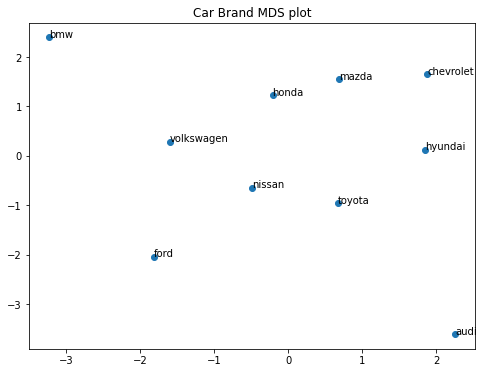

In [142]:
from matplotlib import pyplot as plt
fig= plt.figure(figsize=(8, 6))
ax = fig.add_subplot()
X = lift_df_transformed[:,0]
Y = lift_df_transformed[:,1]
plt.scatter(X,Y )
plt.title('Car Brand MDS plot')
annotations = brand_names 
for i, label in enumerate(annotations):
    plt.annotate(label, (X[i], Y[i]))

plt.show()

In [145]:
#graph 
import plotly.express as px
import plotly.io as pio
pio.renderers
pio.renderers.default = "notebook_connected"


fig = px.scatter(mds_df , x="component0", y= "component1", text = "brand")
fig.update_traces(textposition='top center')

fig.show()